# **Pie Plot**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotly.offline import iplot
import plotly.graph_objs as go

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install --upgrade plotly 

In [ ]:
!pip install jupyter-dash

In [ ]:
timesData = pd.read_csv("/content/drive/MyDrive/data/timesData.csv")

In [ ]:
timesData.head()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011


In [ ]:
df2016 = timesData[timesData.year == 2016].iloc[:7,:] #2016 yılındaki ilk 7 üniversiteden bir filtre oluşturulup, bu filtre dataya uygulanır.
df2016.info() #num_students -> öğrencilerin sayısının bulunduğu sütun string türündedir, floata çevrilmesi lazımdır.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

In [ ]:
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name                                              #değerlerdeki virgüller noktaya dönüştürülüp, floata çevrildi.

In [ ]:
# figure
fig = {  #figür içerisine data ve layout yazılır.
  "data": [  #içerisinde trace oluşturulur.
    {
      "values": pie1_list, #öğrenci sayıları
      "labels": labels,    #üniversite adı
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates", #trace'in adı verilir.
      "hoverinfo":"label+percent+name",   #bir değerin üzerine gelindiğinde hangi bilgilerin verileceğinin bilgisi
      "hole": .3,  #pie chart'ın ortasındaki boşluğun genişliği
      "type": "pie" #plot türü
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": True, #text ismi bir okla gösterilir.
              "text": "Number of Students",
                "x": 0.20, 
                "y": 1     #x ve y ekseninin yerleri
            },
        ]
    }
}
iplot(fig)  #figür plot edilir.

Github'da Ipython kernel olmadığı için pyplot görselleştirmeleri 
gözükmemektedir. Bu yüzden png formatında yüklenmiştir.

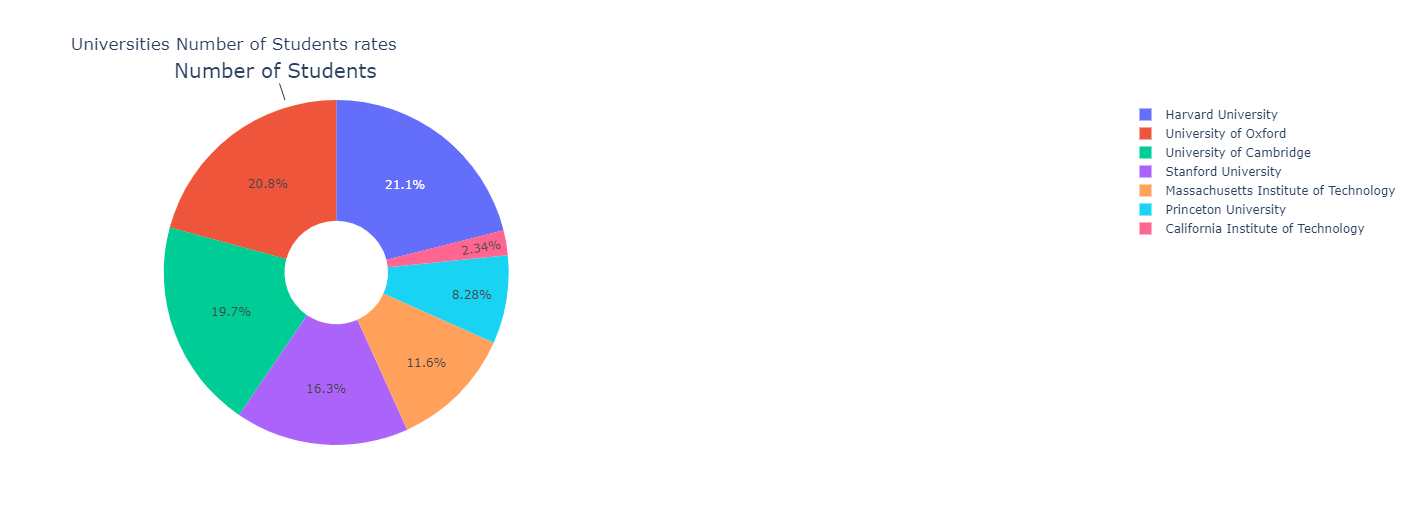

In [ ]:
np.sum(pie1_list) #ilk 7 üniversitedeki öğrencilerin toplamı

95.725

In [ ]:
#Harvard Üniversitesi için oran hesaplanırken
20.152*100/95.725  #çıkan sonuç pie charttaki orandır.

21.051971794202142

Datada Harvard'daki öğrenci sayısı 20,152 ama data pie chartta 21.1 olarak gözükür.
Öğrencilerin sayısını pie plot otomatik olarak bir oran haline getirip görselleştirmeyi yapar.